In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import your custom modules
import sys
sys.path.append('../src') # Add src directory to Python path
from data_loader import load_all_historical_data
from technical_analysis import add_all_common_indicators
from financial_metrics import add_all_common_financial_metrics

# Configure plot styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['figure.dpi'] = 100

# Load all Historical data

In [26]:
# Load all historical stock data files
all_stock_data = load_all_historical_data(data_dir='../data/yfinance_data')

print(f"\nSuccessfully loaded data for {len(all_stock_data)} tickers:")
for ticker in all_stock_data.keys():
    print(f"- {ticker}")

# Display a sample of one stock's data
print("\nExample: AAPL Historical Data Head (raw):")
if 'AAPL' in all_stock_data:
    print(all_stock_data['AAPL'].head())
else:
    print("AAPL data not loaded. Check data_dir path and filenames.")

Loaded AAPL data from AAPL_historical_data.csv
Loaded AMZN data from AMZN_historical_data.csv
Loaded GOOG data from GOOG_historical_data.csv
Loaded META data from META_historical_data.csv
Loaded MSFT data from MSFT_historical_data.csv
Loaded NVDA data from NVDA_historical_data.csv
Loaded TSLA data from TSLA_historical_data.csv

Successfully loaded data for 7 tickers:
- AAPL
- AMZN
- GOOG
- META
- MSFT
- NVDA
- TSLA

Example: AAPL Historical Data Head (raw):
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

     

# Apply TA_Lib indicators and Financial Metrics to all Stocks

In [27]:
#This step directky addresses Apply Analysis indicators with TA_Lib 
#and use Pynance for financial metrics
processed_stock_data = {}
for ticker, df in all_stock_data.items():
    print(f"\n--- Processing {ticker} ---")
    df.name = ticker # Assign name to DataFrame for potential use in functions

    # Apply TA-Lib indicators
    df_with_indicators = add_all_common_indicators(df)
    
    # Apply Financial Metrics (using pandas, fulfilling 'PyNance' for metrics)
    df_final = add_all_common_financial_metrics(df_with_indicators)
    
    # Store the processed DataFrame in our dictionary
    processed_stock_data[ticker] = df_final
    print(f"Finished processing {ticker}. Added {len(df_final.columns) - len(df.columns)} new columns.")
    
# Display columns of a processed DataFrame to confirm
print("\nExample: AAPL Processed Data Columns:")
if 'AAPL' in processed_stock_data:
    print(processed_stock_data['AAPL'].columns.tolist())
    print("\nAAPL Processed Data Tail:")
    print(processed_stock_data['AAPL'].tail())


--- Processing AAPL ---
Finished processing AAPL. Added 20 new columns.

--- Processing AMZN ---
Finished processing AMZN. Added 20 new columns.

--- Processing GOOG ---
Finished processing GOOG. Added 20 new columns.

--- Processing META ---
Finished processing META. Added 20 new columns.

--- Processing MSFT ---
Finished processing MSFT. Added 20 new columns.

--- Processing NVDA ---
Finished processing NVDA. Added 20 new columns.

--- Processing TSLA ---
Finished processing TSLA. Added 20 new columns.

Example: AAPL Processed Data Columns:
['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits', 'SMA_10', 'SMA_20', 'SMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist', 'Upper_Band', 'Middle_Band', 'Lower_Band', 'STOCH_K', 'STOCH_D', 'ADX', 'OBV', 'AD', 'ATR', 'Daily_Return', 'Log_Return', 'Volatility', 'Price_Change']

AAPL Processed Data Tail:
                  Open        High         Low       Close   Adj Close  \
Date                                   

In [28]:
output_folder = '../data/processed'
os.makedirs(output_folder, exist_ok=True)
for ticker, df_final in processed_stock_data.items():
    filename = f"{ticker}_processed_stock_data.csv"
    output_path = os.path.join(output_folder, filename)
    df_final.to_csv(output_path, index=False)
    print(f"Saved {ticker} processed data to {output_path}")

Saved AAPL processed data to ../data/processed\AAPL_processed_stock_data.csv
Saved AMZN processed data to ../data/processed\AMZN_processed_stock_data.csv
Saved GOOG processed data to ../data/processed\GOOG_processed_stock_data.csv
Saved META processed data to ../data/processed\META_processed_stock_data.csv
Saved MSFT processed data to ../data/processed\MSFT_processed_stock_data.csv
Saved NVDA processed data to ../data/processed\NVDA_processed_stock_data.csv
Saved TSLA processed data to ../data/processed\TSLA_processed_stock_data.csv


# Visualize the Data and Impact of Indicators

Generating plots for AAPL...


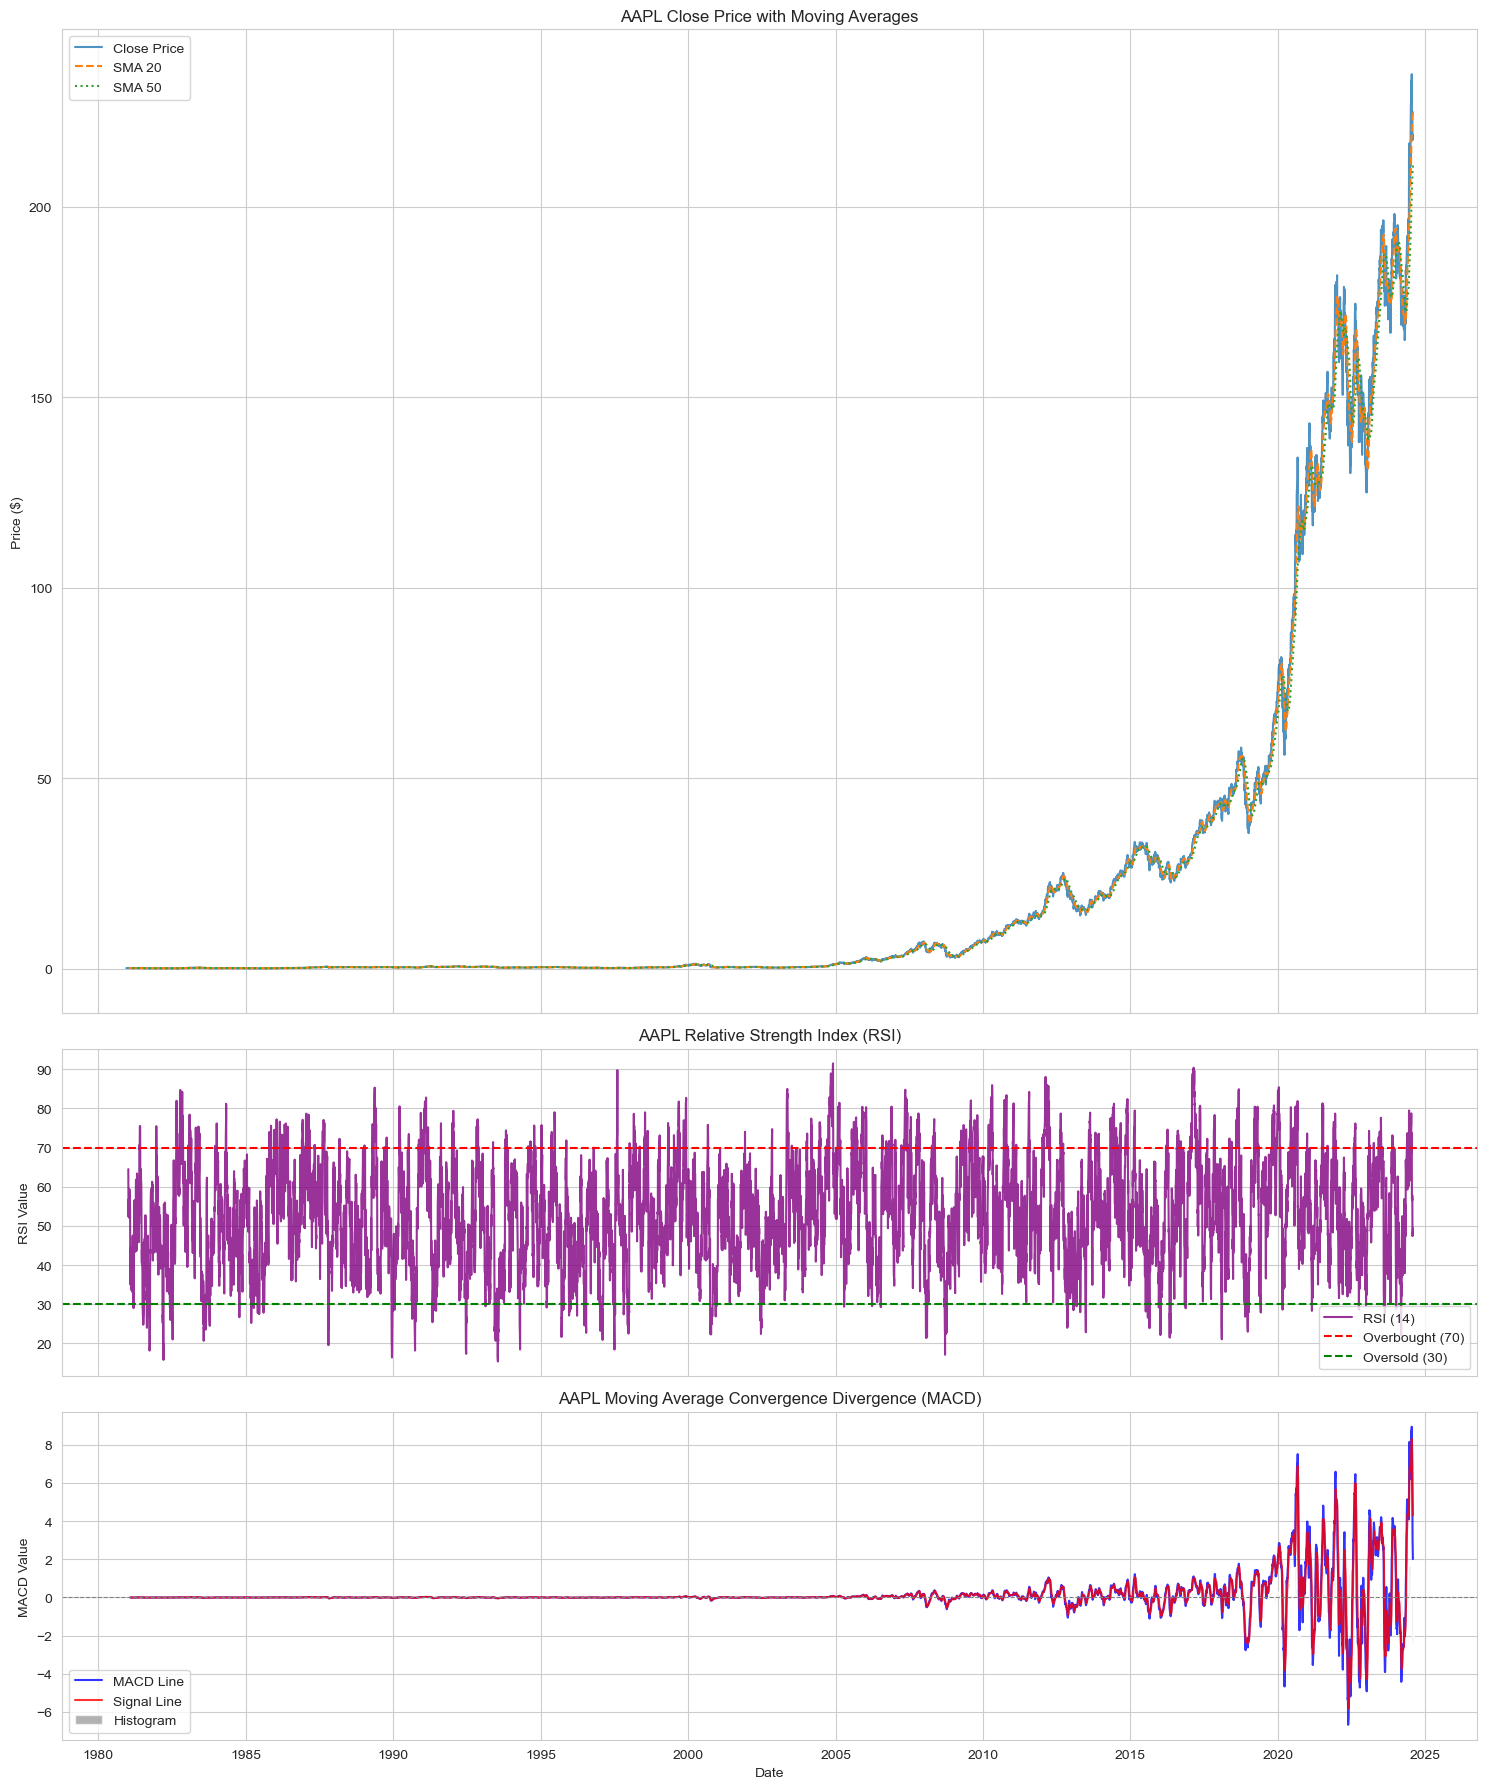

Generating plots for AMZN...


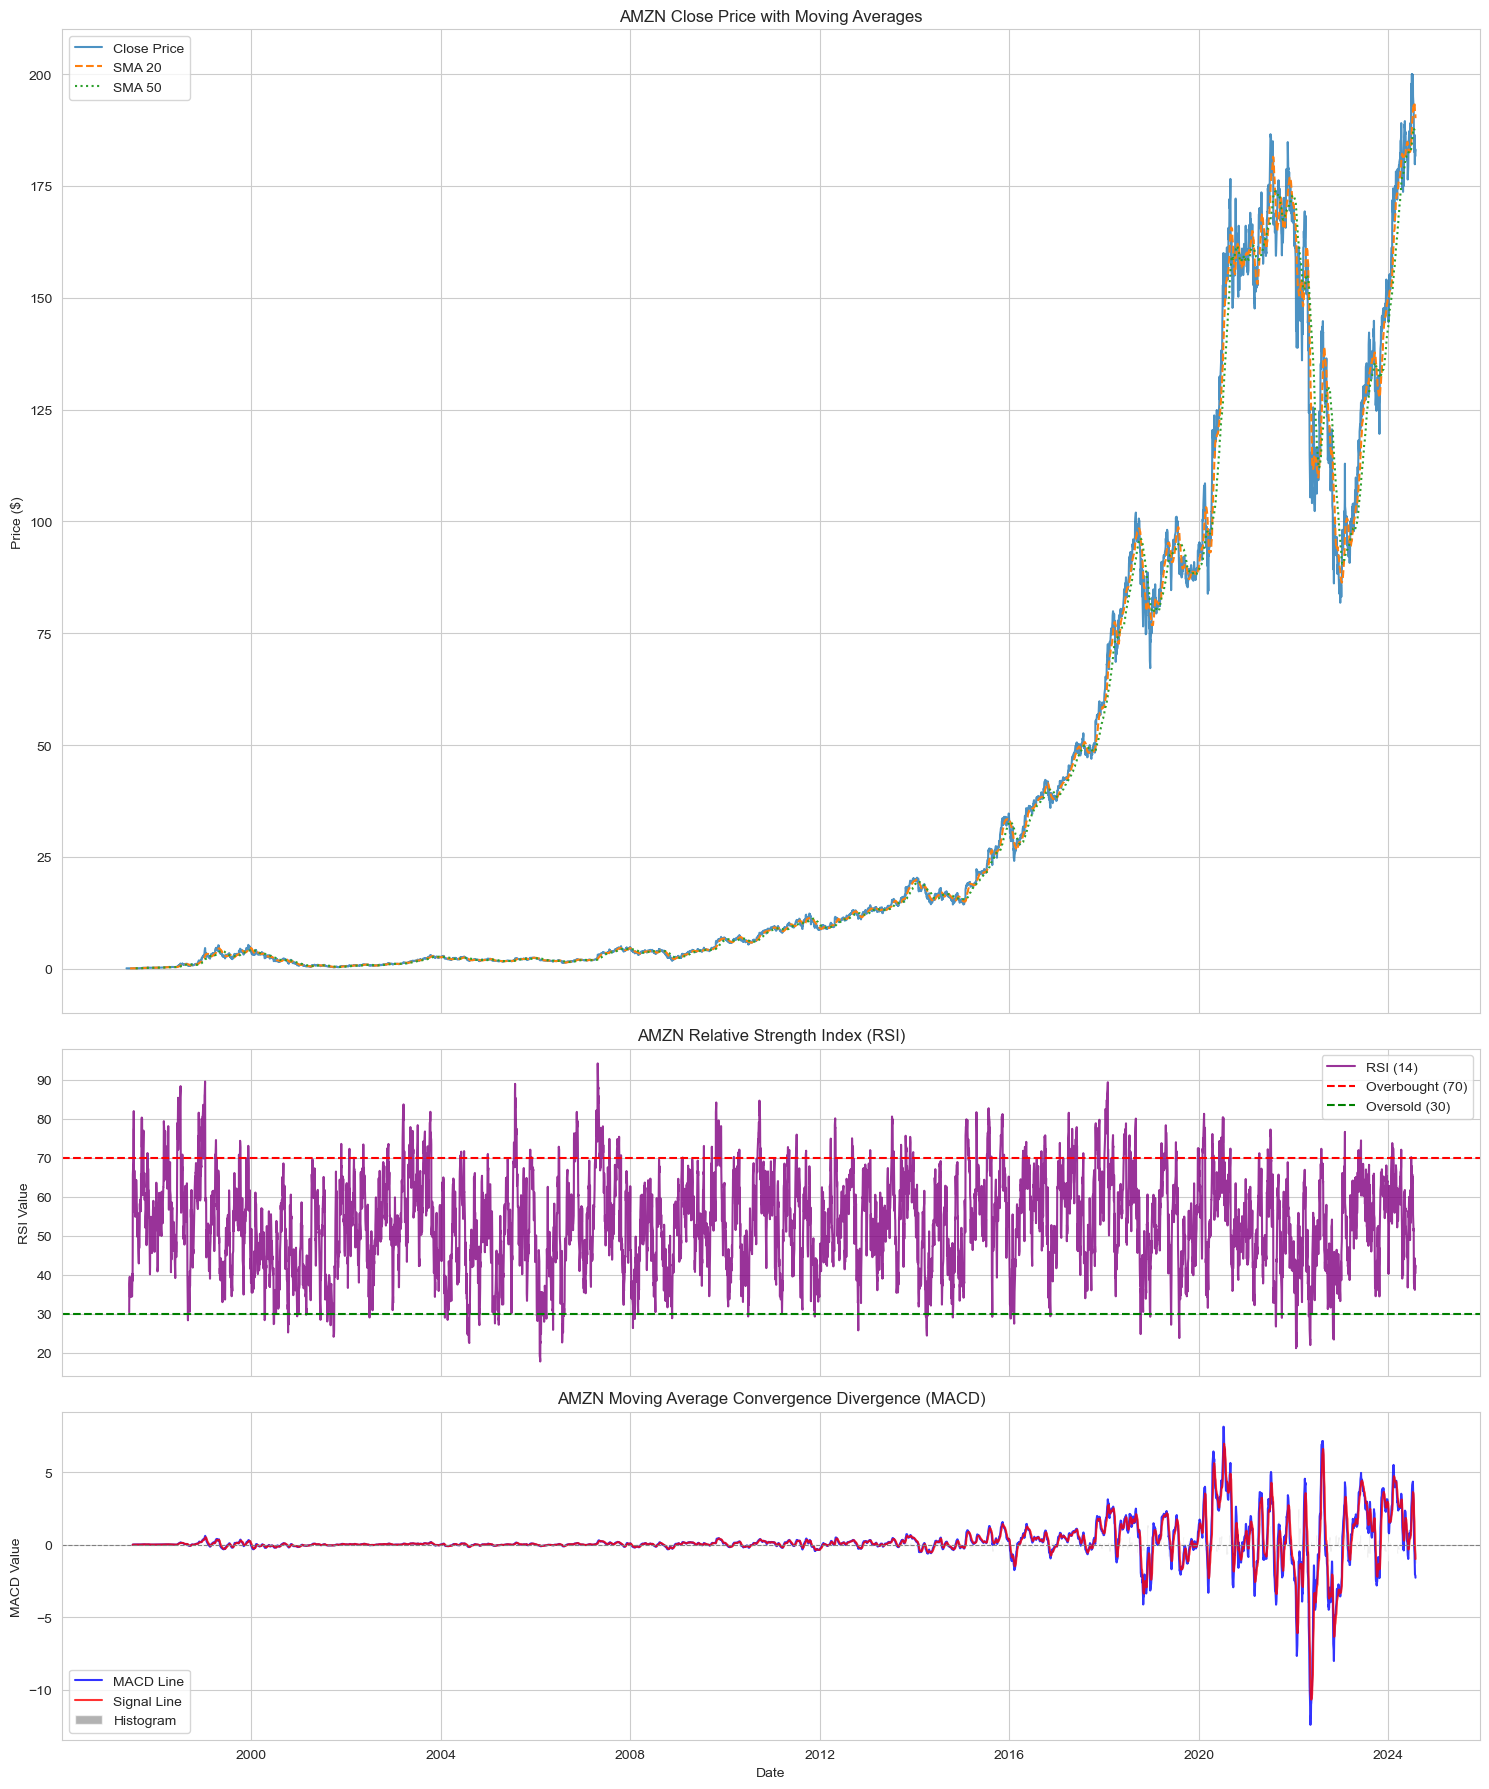

Generating plots for GOOG...


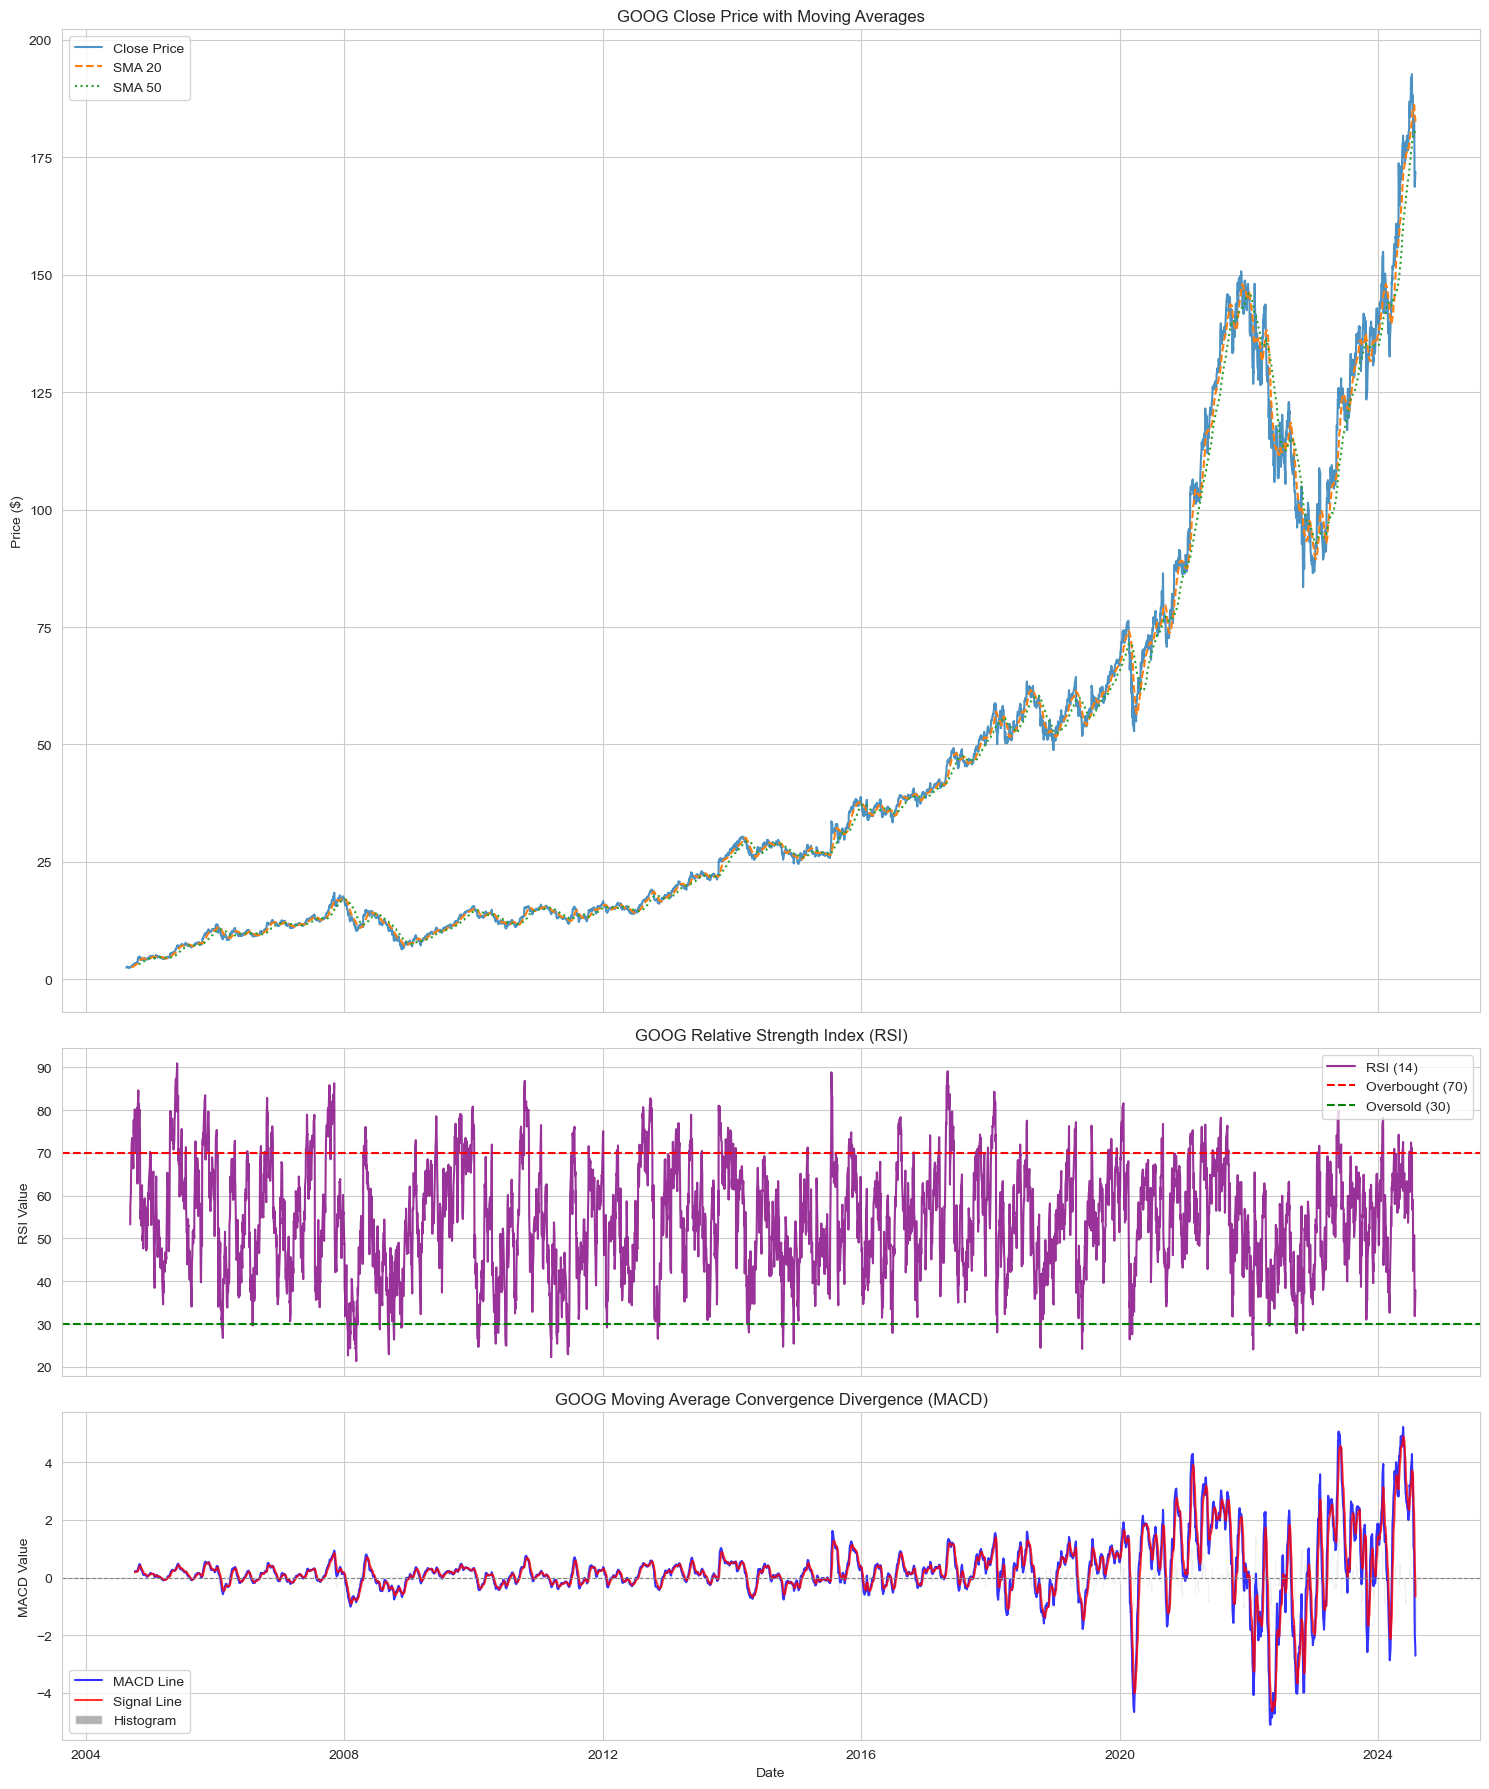

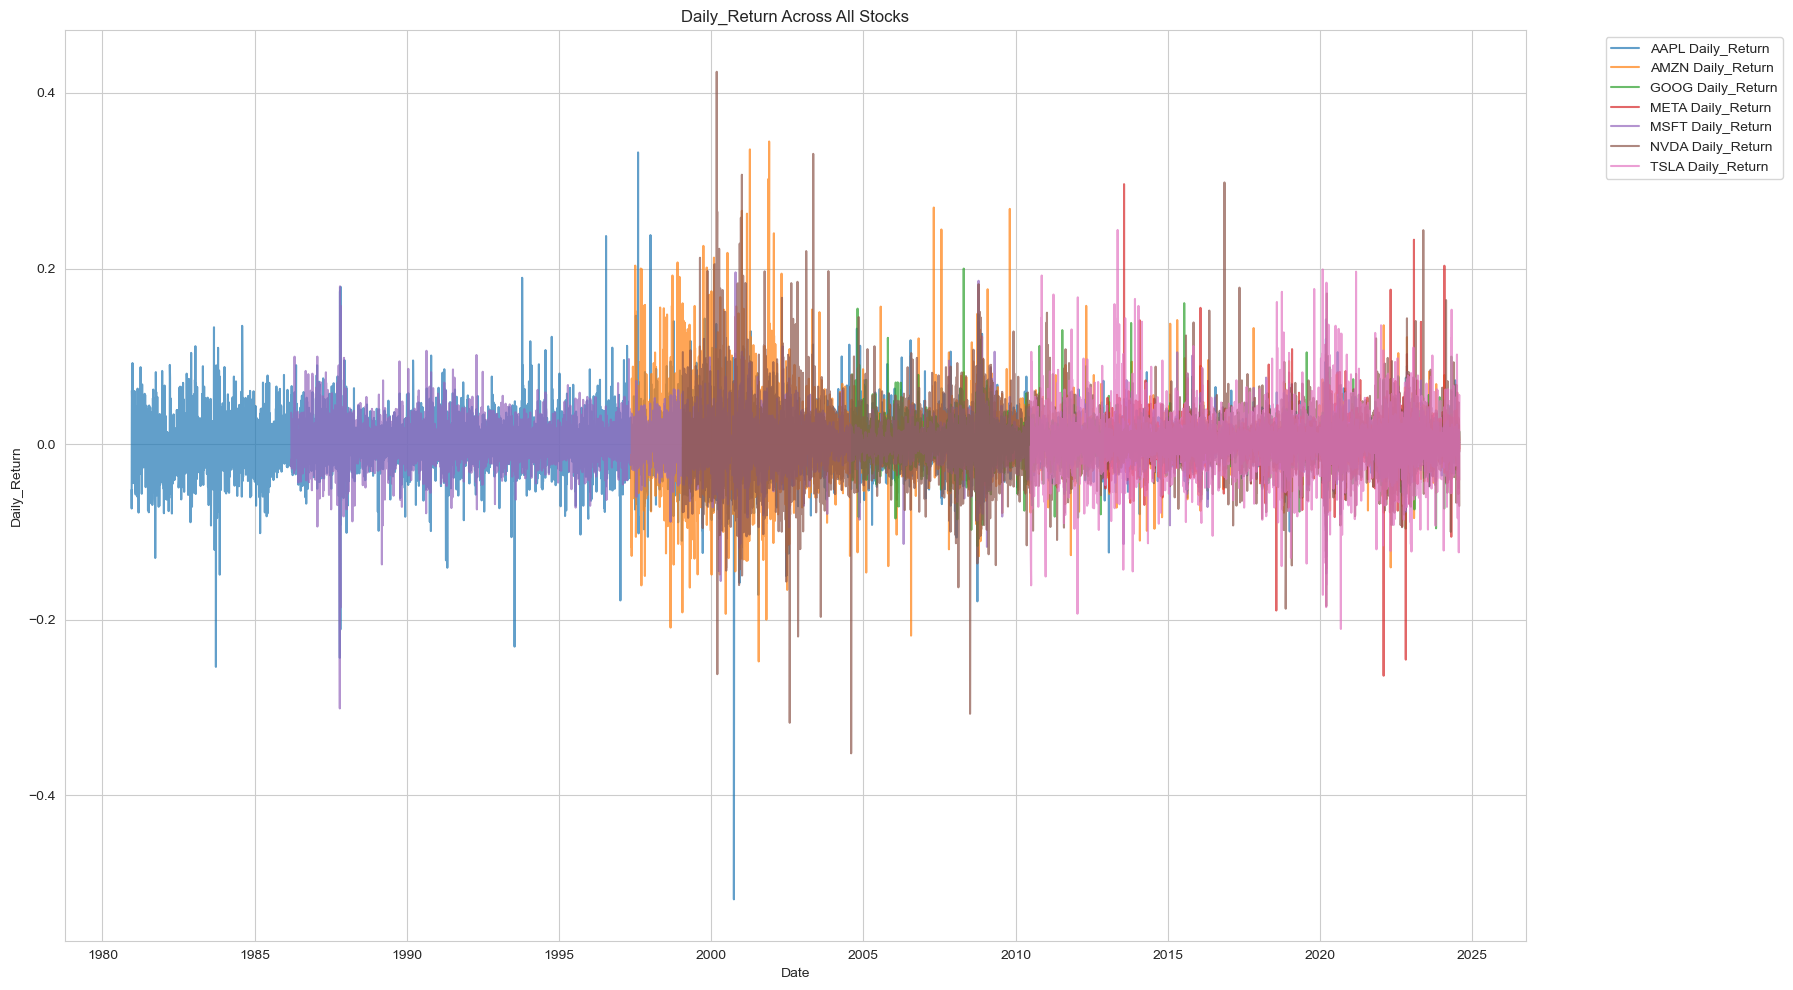

In [29]:
# --- Visualization Function for a Single Stock ---
def plot_stock_with_indicators(ticker, df):
    """
    Plots Close Price with SMAs, and separate plots for RSI and MACD for a given stock.
    """
    if df.empty or not all(col in df.columns for col in ['Close', 'SMA_20', 'SMA_50', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']):
        print(f"Skipping plot for {ticker}: Missing required indicator columns or empty DataFrame.")
        return

    print(f"Generating plots for {ticker}...")

    fig, axes = plt.subplots(3, 1, figsize=(15, 18), sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})

    # Plot 1: Close Price with SMAs
    axes[0].plot(df.index, df['Close'], label='Close Price', alpha=0.8)
    axes[0].plot(df.index, df['SMA_20'], label='SMA 20', linestyle='--')
    axes[0].plot(df.index, df['SMA_50'], label='SMA 50', linestyle=':')
    axes[0].set_title(f'{ticker} Close Price with Moving Averages')
    axes[0].set_ylabel('Price ($)')
    axes[0].legend()
    axes[0].grid(True)

    # Plot 2: RSI
    axes[1].plot(df.index, df['RSI'], label='RSI (14)', color='purple', alpha=0.8)
    axes[1].axhline(70, linestyle='--', color='red', label='Overbought (70)')
    axes[1].axhline(30, linestyle='--', color='green', label='Oversold (30)')
    axes[1].set_title(f'{ticker} Relative Strength Index (RSI)')
    axes[1].set_ylabel('RSI Value')
    axes[1].legend()
    axes[1].grid(True)

    # Plot 3: MACD
    axes[2].plot(df.index, df['MACD'], label='MACD Line', color='blue', alpha=0.8)
    axes[2].plot(df.index, df['MACD_Signal'], label='Signal Line', color='red', alpha=0.8)
    axes[2].bar(df.index, df['MACD_Hist'], label='Histogram', color='gray', alpha=0.6)
    axes[2].axhline(0, color='grey', linestyle='--', linewidth=0.8)
    axes[2].set_title(f'{ticker} Moving Average Convergence Divergence (MACD)')
    axes[2].set_xlabel('Date')
    axes[2].set_ylabel('MACD Value')
    axes[2].legend()
    axes[2].grid(True)

    plt.tight_layout()
    plt.show()

# --- Plotting for all stocks ---
# You can choose to plot all, or select a few for a cleaner notebook output.
# For demonstration, let's plot for the first 3 stocks
tickers_to_visualize = list(processed_stock_data.keys())[:3] # Example: Plot first 3 tickers

for ticker in tickers_to_visualize:
    df_to_plot = processed_stock_data.get(ticker)
    if df_to_plot is not None:
        plot_stock_with_indicators(ticker, df_to_plot)
    else:
        print(f"No processed data found for {ticker} to visualize.")

# --- Optional: Compare a single metric across all stocks ---
plt.figure(figsize=(18, 10))
metric_to_compare = 'Daily_Return' # Or 'Volatility', 'RSI', 'SMA_20', etc.

for ticker, df in processed_stock_data.items():
    if metric_to_compare in df.columns:
        plt.plot(df.index, df[metric_to_compare], label=f'{ticker} {metric_to_compare}', alpha=0.7)
    else:
        print(f"Warning: {metric_to_compare} not found for {ticker}.")

plt.title(f'{metric_to_compare} Across All Stocks')
plt.xlabel('Date')
plt.ylabel(metric_to_compare)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Prepare or the next step (Project Integration)

In [30]:
print("\n--- Quantitative Analysis Phase Complete ---")
print("All historical stock data files have been loaded, cleaned, and enriched with:")
print("1. Key Technical Indicators (from TA-Lib)")
print("2. Common Financial Metrics (e.g., returns, volatility)")
print("\nThese enriched DataFrames are stored in the processed_stock_data dictionary, ready for further analysis.")

print("\nNext Steps (Moving towards Correlation Analysis):")
print("1. News Data Processing: Ensure financial_news.csv is processed (cleaned, sentiment scores added) for ALL relevant stocks.")
print("   - You would do this in EDA_and_Data_Prep.ipynb using the news_processor.py module.")
print("   - Aggregate daily sentiment scores for each stock in the news data.")
print("2. Merge Data: Create a new notebook (Correlation_Analysis.ipynb). In this notebook, you will:")
print("   - Load the processed_stock_data (from this notebook).")
print("   - Load the processed news data (from news_processor.py).")
print("   - For each stock ticker, merge its processed historical data with its aggregated daily sentiment scores based on date.")
print("3. Correlation & Modeling:")
print("   - Perform correlation analysis between sentiment scores, technical indicators, financial metrics, and various stock price movements (e.g., next-day returns).")
print("   - This combined dataset will be the foundation for building predictive models and developing investment strategies, leveraging both qualitative (news sentiment) and quantitative (technical/financial) data.")


--- Quantitative Analysis Phase Complete ---
All historical stock data files have been loaded, cleaned, and enriched with:
1. Key Technical Indicators (from TA-Lib)
2. Common Financial Metrics (e.g., returns, volatility)

These enriched DataFrames are stored in the processed_stock_data dictionary, ready for further analysis.

Next Steps (Moving towards Correlation Analysis):
1. News Data Processing: Ensure financial_news.csv is processed (cleaned, sentiment scores added) for ALL relevant stocks.
   - You would do this in EDA_and_Data_Prep.ipynb using the news_processor.py module.
   - Aggregate daily sentiment scores for each stock in the news data.
2. Merge Data: Create a new notebook (Correlation_Analysis.ipynb). In this notebook, you will:
   - Load the processed_stock_data (from this notebook).
   - Load the processed news data (from news_processor.py).
   - For each stock ticker, merge its processed historical data with its aggregated daily sentiment scores based on date.
3. Corr